In [1]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration
from rdkit.Chem import PandasTools
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

In [3]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]

    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, includeFingerprints=True, embedProps=True)
    df['NumHeavyAtoms'] = df.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
        
    fragments = []
    fingerprints = []
    smiles =[]

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        fragments.append(fixed_frag)
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
        # smiles for comparing fragments
        smiles.append(Chem.MolToSmiles(fixed_frag))
      
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:18] Unexpected error hit on line 56
RDKit ERROR: [14:33:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:18] Unexpected error hit on line 119
RDKit ERROR: [14:33:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /o

RDKit ERROR: [14:33:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:18] Unexpected error hit on line 13947
RDKit ERROR: [14:33:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:18] Unexpected error hit on line 14037
RDKit ERROR: [14:33:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 27571
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 27632
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 29 < 29
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 41302
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 29 < 29
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 41453
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/G

RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 55162
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 55215
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 67905
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 67972
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 80548
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:19] Unexpected error hit on line 80633
RDKit ERROR: [14:33:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:20] Unexpected error hit on line 94838
RDKit ERROR: [14:33:20] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:20] Unexpected error hit on line 94901
RDKit ERROR: [14:33:20] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:20] Unexpected error hit on line 109419
RDKit ERROR: [14:33:20] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:20] Unexpected error hit on line 109477
RDKit ERROR: [14:33:20] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:20] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:33:20] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:21] Unexpected error hit on line 47
RDKit ERROR: [14:33:21] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:21] Unexpected error hit on line 102
RDKit ERROR: [14:33:21] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 13788
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 13842
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 65
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 129
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range 

RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 12470
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 12536
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 25744
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 25824
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 38881
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:22] Unexpected error hit on line 38947
RDKit ERROR: [14:33:22] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 52113
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 52168
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 65113
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 65168
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 77130
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 77192
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 89970
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 90034
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 102937
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:23] Unexpected error hit on line 102992
RDKit ERROR: [14:33:23] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 116289
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 116342
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 22 < 22
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 129521
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 129597
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 i

RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 142024
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 142087
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 142151
RDKit ERROR:

RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 153604
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:24] Unexpected error hit on line 153678
RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 i

RDKit ERROR: [14:33:24] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 56
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 169
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Er

RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 15277
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 15373
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 29171
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 29230
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expres

RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 44106
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:27] Unexpected error hit on line 44161
RDKit ERROR: [14:33:27] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 59168
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 59227
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 73918
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 73966
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 88738
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 88820
RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:28] Unexpected error hit on line 88891
RDKit ERROR: [14:33:28] ERROR: moving to the begining o

RDKit ERROR: [14:33:28] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:29] Unexpected error hit on line 54
RDKit ERROR: [14:33:29] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:29] Unexpected error hit on line 121
RDKit ERROR: [14:33:29] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 484
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 577
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Err

RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 13664
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 13717
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 27165
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 27234
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 40596
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 40674
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERR

RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 53388
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:30] Unexpected error hit on line 53449
RDKit ERROR: [14:33:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:33:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

(6798, 15)

In [42]:
n_frags_per_sp = {}
for sp in subpockets:
    n_frags_per_sp[sp] = data[data.subpocket == sp].shape[0]
n_frags_per_sp

{'FP': 1621, 'B2': 237, 'AP': 2395, 'SE': 1404, 'B1': 106, 'GA': 1035}

Similarity of fragments between the kinase groups:

In [4]:
groups = data.group.unique()

In [5]:
# matrix with mean similarites between groups 
sim_matrix1 = pd.DataFrame(0, index=groups, columns=groups)
# matrix with mean similarities between groups averaged over subpockets
sim_matrix = pd.DataFrame(0, index=groups, columns=groups)
# one similarity matrix for each subpocket
sim_matrices = {}
for sp in subpockets:
    sim_matrices[sp] = pd.DataFrame(0, index=groups, columns=groups)

# iterate over groups
for g1 in groups:
    for g2 in groups:
        
        dg1 = data[data.group==g1]
        dg2 = data[data.group==g2]
        
        sum_all_sims = 0
        count_all_sims = 0
        sum_mean_sims = 0
        count_sps = 0
        # iterate over subpockets
        for sp in subpockets:
            
            dg1sp = dg1[dg1.subpocket==sp]
            dg2sp = dg2[dg2.subpocket==sp]
            
            if dg1sp.empty or dg2sp.empty:
                sim_matrices[sp].loc[g1,g2] = None
                continue
            
            count_sims = 0
            sum_sims = 0
            # iterate over fragment pairs
            for i, fp1 in enumerate(dg1sp.fingerprint):
                for j, fp2 in enumerate(dg2sp.fingerprint):
                    
                    if g1 != g2 or i != j:
                        sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                        sum_sims += sim
                        sum_all_sims += sim
                        count_sims += 1
                        count_all_sims += 1
            
            # if nothing was compared
            if count_sims == 0:
                sim_matrices[sp].loc[g1,g2] = None
                continue
                        
            mean_sim = sum_sims/count_sims  
            sum_mean_sims += mean_sim
            count_sps += 1
            sim_matrices[sp].loc[g1,g2] = mean_sim
   
        sim_matrix1.loc[g1,g2] = sum_all_sims/count_all_sims
        
        sim_matrix.loc[g1, g2] = sum_mean_sims/count_sps

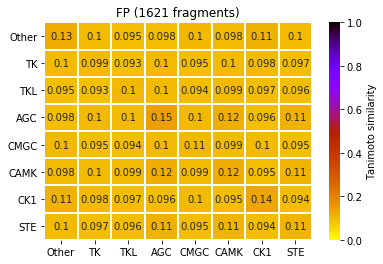

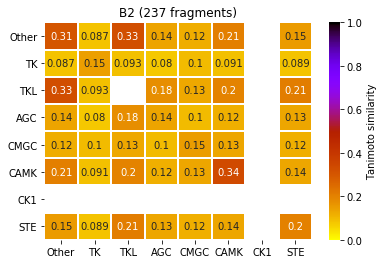

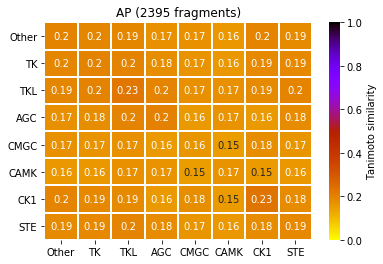

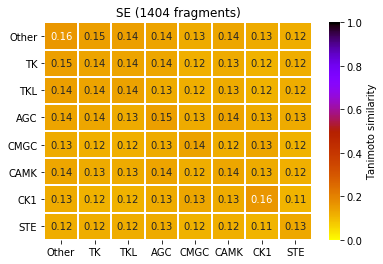

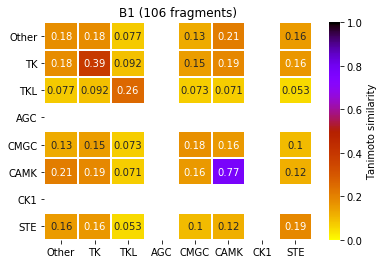

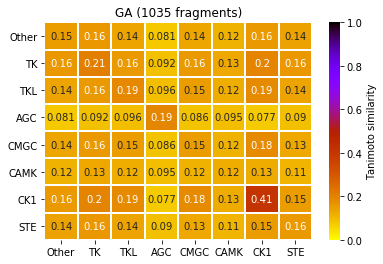

In [43]:
for sp in subpockets:
    sns.heatmap(sim_matrices[sp], linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="gnuplot_r",
               vmin=0, vmax=1)
    plt.title(sp+' ('+str(n_frags_per_sp[sp])+' fragments)')
    plt.show()

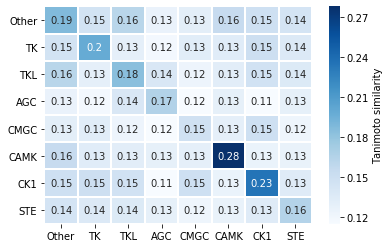

In [44]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

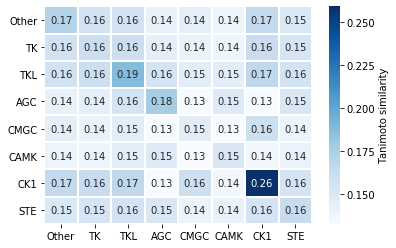

In [45]:
sns.heatmap(sim_matrix1, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

Similarity of fragments within kinase groups per subpocket:

In [46]:
sim_matrix = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])
sims1 = pd.Series(0, index=groups)

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    sum_all_sims = 0
    count_all_sims = 0
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dgsp.fingerprint):
            for j, fp2 in enumerate(dgsp.fingerprint):
                
                if i != j:

                    sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                    sum_sims += sim
                    sum_all_sims += sim
                    count_sims += 1
                    count_all_sims += 1
                    
        if count_sims == 0:
            sim_matrix.loc[group, sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sim_matrix.loc[group, sp] = mean_sim
        
    mean_group = sum_all_sims/count_all_sims
    sims1.loc[group] = mean_group

In [47]:
sims = pd.Series(0, index=subpockets)

# total similarity per subpocket
for sp in subpockets:
    
        dsp = data[data.subpocket==sp]
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dsp.fingerprint):
            for j, fp2 in enumerate(dsp.fingerprint):
                
                if i != j:

                    sum_sims += DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                    count_sims += 1
                    
        if count_sims == 0:
            sims.loc[sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sims.loc[sp] = mean_sim

In [48]:
sims

FP    0.100817
B2    0.118750
AP    0.173518
SE    0.130988
B1    0.170867
GA    0.145750
dtype: float64

In [49]:
sims1

Other    0.171353
TK       0.160590
TKL      0.188552
AGC      0.177509
CMGC     0.146499
CAMK     0.152555
CK1      0.259140
STE      0.163802
dtype: float64

In [50]:
sim_matrix.loc['Total'] = sims
sim_matrix['Total'] = sims1

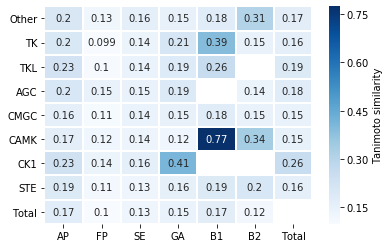

In [210]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

In [212]:
n_frags = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        n = dgsp.shape[0]
        n_frags.loc[group, sp] = n

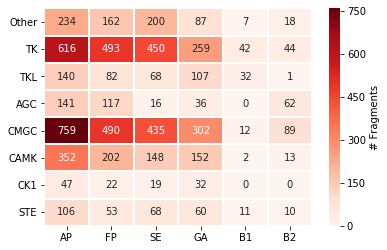

In [214]:
sns.heatmap(n_frags, linewidths=1, annot=True, cbar_kws={"label": "# Fragments"}, cmap="Reds", fmt='g')
plt.show()

In [235]:
# number of fragments per kinase group as bar plot
n_frags_per_group = n_frags.sum(axis=1)
n_frags_per_group

Other     708
TK       1904
TKL       430
AGC       372
CMGC     2087
CAMK      869
CK1       120
STE       308
dtype: int64

In [242]:
n_unique = pd.Series(0, index=groups)

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n_unique.loc[group] += nu
        

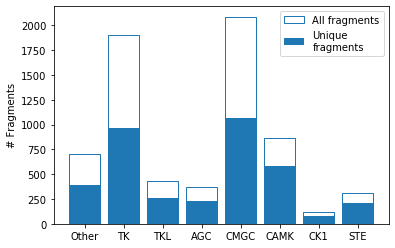

In [248]:
plt.figure()
plt.bar(groups, n_frags_per_group, fill=False, edgecolor='tab:blue')
plt.bar(groups, n_unique, color='tab:blue')
plt.legend(['All fragments', 'Unique\nfragments'])
plt.ylabel('# Fragments')
plt.show()

In [127]:
# convert to relative numbers
n_frags.loc['Total'] = n_frags.sum()

In [128]:
total = n_frags.sum(axis=1)
for index, row in n_frags.iterrows():
    n_frags.loc[index] = row/total[index]

In [164]:
n_frags = n_frags*100

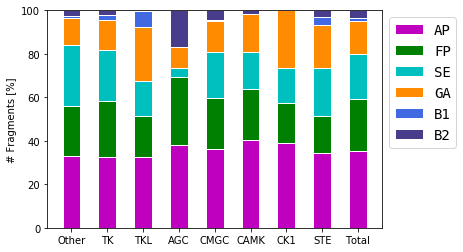

In [208]:
# n_frags as stacked bar plot
r = range(len(groups)+1)
df = n_frags
 
# plot
barWidth = 0.5

plt.figure()
plt.bar(r, df['AP'], edgecolor='white', width=barWidth, color='m', label='AP')
plt.bar(r, df['FP'], bottom=df['AP'], edgecolor='white', width=barWidth, color='g', label='FP')
plt.bar(r, df['SE'], bottom=[i+j for i,j in zip(df['AP'], df['FP'])], edgecolor='white', width=barWidth, color='c', label='SE')
plt.bar(r, df['GA'], bottom=[i+j+k for i,j,k in zip(df['AP'], df['FP'], df['SE'])], 
        edgecolor='white', width=barWidth, color='darkorange', label='GA')
plt.bar(r, df['B1'], bottom=[i+j+k+l for i,j,k,l in zip(df['AP'], df['FP'], df['SE'], df['GA'])], 
        edgecolor='white', width=barWidth, color='royalblue', label='B1')
plt.bar(r, df['B2'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df['AP'], df['FP'], df['SE'], df['GA'], df['B1'])], 
        edgecolor='white', width=barWidth, color='darkslateblue', label='B2')
 
# Custom x axis
plt.xticks(r, list(groups)+['Total'])
plt.ylabel('# Fragments [%]')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'size': 14, 'family': 'monospace'})
 
# Show graphic
plt.show()

In [222]:
n_unique = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n = dgsp.shape[0]
        if n != 0:
            n_unique.loc[group, sp] = round(nu/n*100, 1)
        else:
            n_unique.loc[group, sp] = 0

In [224]:
n_unique_total = pd.Series(0, index=groups)

# unique fragments per group per subpocket
for group in groups:
    
    df = data[data.group==group]
    total = df.shape[0]
    n = 0
    
    for subpocket in subpockets:
        
        n_s = df[df.subpocket==subpocket].smiles.nunique()
        n += n_s
    
    n_unique_total.loc[group] = round(n/total*100, 1)

In [225]:
n_unique_sp = pd.Series(0, index=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# unique fragments per subpocket
for sp in subpockets:
    
    df = data[data.subpocket==sp]
    total = df.shape[0]
    n = df.smiles.nunique()
    
    if total != 0:
        n_unique_sp.loc[sp] = round(n/total*100, 1)
    else: 
        0

In [226]:
n_unique['Total'] = n_unique_total
n_unique.loc['Total'] = n_unique_sp

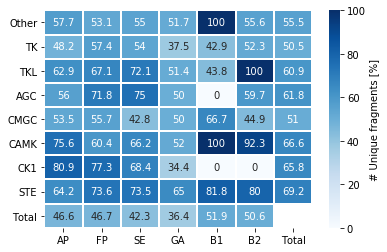

In [227]:
sns.heatmap(n_unique, linewidths=1, annot=True, cbar_kws={"label": "# Unique fragments [%]"}, cmap="Blues", fmt='g')
plt.show()

In [228]:
# average number of unique fragments per kinase group
sum(n_unique_total.drop('Other'))/7

60.82857142857142

In [229]:
sum(n_unique_sp)/6

45.75000000000001